In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from math import pow

In [132]:
#functions for biochemical equations
def molecules(number): #turns nM to molecules
    return number*NA*10**(-15)

def molar(number): #turns molecules to uM
    return(number*10**(15))/NA

def single_cell(x,t): 
    AHL_int=x[0]
    LuxR=x[1]
    Mon=x[2]
    Dim=x[3]
    mng=x[4]

    dAHLdt=small+k_min_one*Mon-k1*AHL_int*LuxR -(d_AHL+mi)*AHL_int 
    dLuxRdt=small+ molar(((kluxr*pcon*CN))/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL_int
    dMondt=small+ (k1*LuxR*AHL_int+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt=small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt =small+ ((kmng*plux*CN)/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux,n))))) - (d_mng+mi)*mng
    
    return [dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]

def whole_cell(x,t):
    Ni=x[0]
    AHL_ext=x[1]
    AHL_int=x[2]
    LuxR=x[3]
    Mon=x[4]
    Dim=x[5]
    mng=x[6]

    
    dNdt=small+mi*Ni*(1-(Ni/Nmax))
    dAHL_extdt=small+D*Vc*Ni*(AHL_int-AHL_ext)-(d_AHL+mi)*AHL_ext
    dAHLdt=small+k_min_one*Mon-k1*AHL_int*LuxR -(d_AHL+mi)*AHL_int +D*Vc*10**(11)*(AHL_ext-AHL_int)
    dLuxRdt=small+ molar(((kluxr*pcon*CN))/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL_int
    dMondt=small+ (k1*LuxR*AHL_int+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt=small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt =small+ ((kmng*plux*CN)/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux,n))))) - (d_mng+mi)*mng
    
    return [dNdt,dAHL_extdt,dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]


In [131]:
CN=17 #medium copy number
mi= 0.015
NA=6.2*10**(23)
kmng=(18*10**(-3))*60 #RBS34
kluxr=(27*10**(-3))*60 #1.62
kd1=100*10**(-9)
kd2=20*10**(-9)
k_min_one=10
k_min_two=1
k1=k_min_one/kd1
k2=k_min_two/kd2
d_mrnamng=0.039 
d_mng=0.01
d_mrnaluxr=0.347
d_mon=0.156
d_dim=0.017
d_luxr=0.002
d_AHL=0.01
D=10
Nmin=0.129*10**(7)
Nmax=2.142*10**(7)
Vecoli=10**(-15)
Vbead=200*10**(-6)
Vc=Vecoli/Vbead
n=2
b_plux=0.05 #percentage of leakage
plux=0.79 #promoters
pcon=(58.5*10**(-3))*60 #3.51
small=1e-45
t=np.linspace(0, 600) 


10127.309060123207


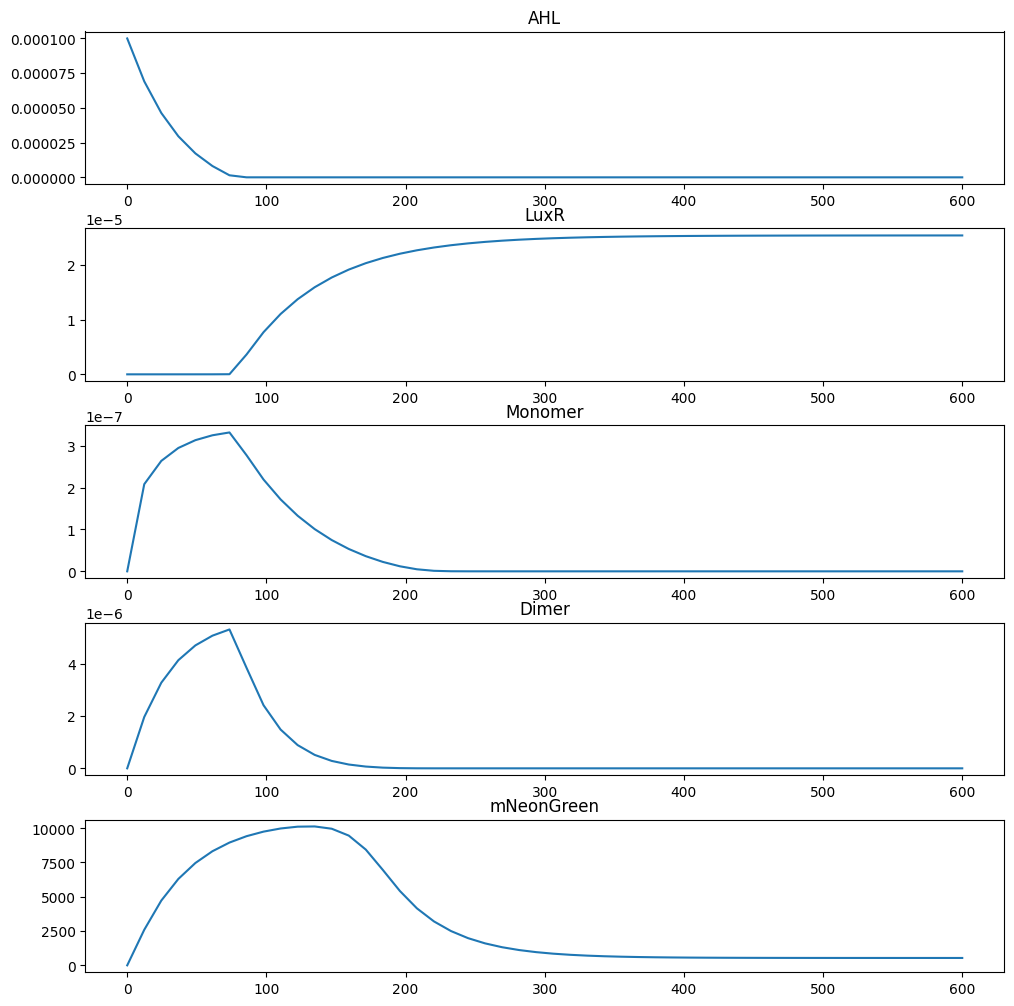

In [107]:
#single-cell time-values (with AHL in molecules)
small=0
n=1.5
kd1=100*10**(-9)
kd2=20*10**(-9)
kdlux=100*10**(-9)
k1=k_min_one/kd1
k2=k_min_two/kd2
x0=[10**(-4),0,0,0,0] #AHL-LuxR-Mon-Dim-mng
solution=odeint(single_cell,x0,t)
fig,axs=plt.subplots(5,figsize=(10,10))
fig.tight_layout()
axs[0].plot(t,solution[:,0])
axs[0].set_title('AHL')
axs[1].plot(t,solution[:,1])
axs[1].set_title('LuxR')
axs[2].plot(t,solution[:,2])
axs[2].set_title('Monomer')
axs[3].plot(t,solution[:,3])
axs[3].set_title('Dimer')
axs[4].plot(t,solution[:,4])
axs[4].set_title('mNeonGreen')
print(max(solution[:,4]))

10714.187653819088


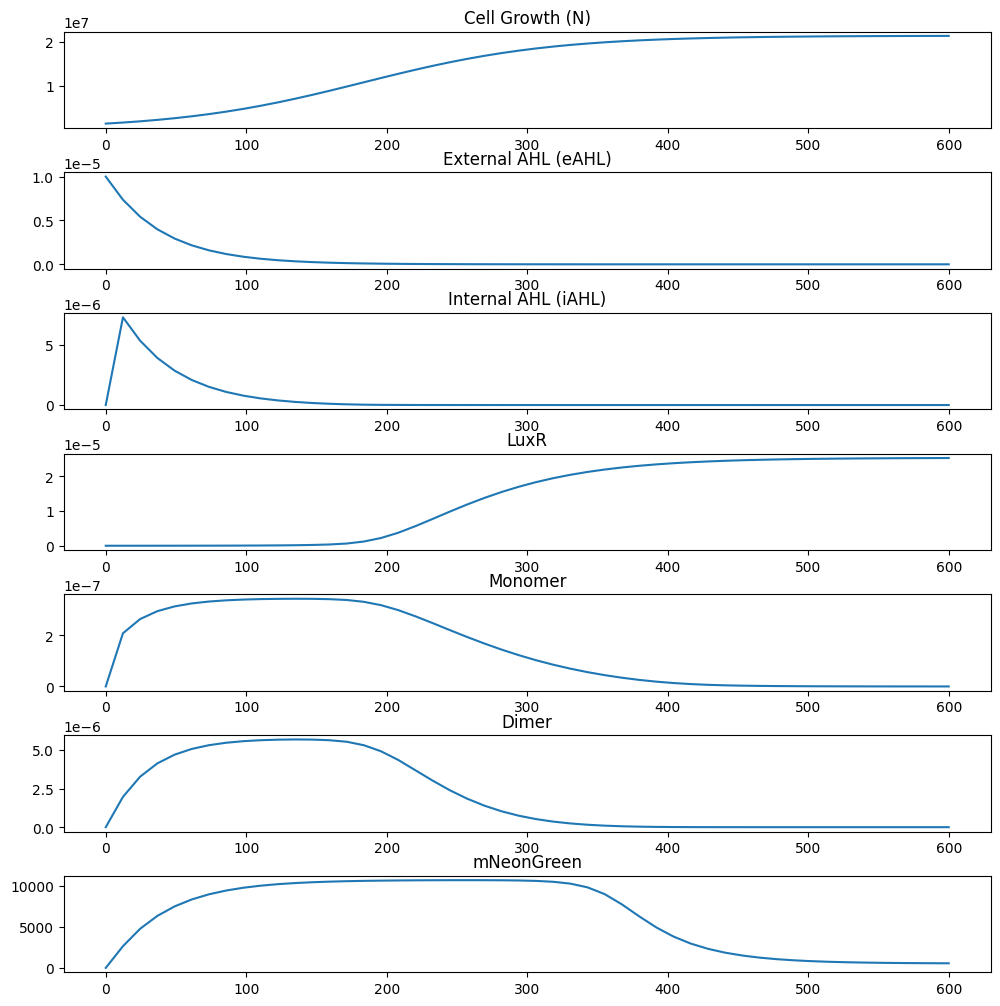

In [133]:
#whole-cell time-values (with AHL in molecules)
small=0
kd1=100*10**(-9)
kd2=20*10**(-9)
kdlux=100*10**(-9)
kdlux_eff=kdlux*CN
k1=k_min_one/kd1
k2=k_min_two/kd2
x0=[Nmin,10**(-5),0,0,0,0,0] #N-AHL_ext-AHL_int-LuxR-Mon-Dim-mng
solution=odeint(whole_cell,x0,t)
fig,axs=plt.subplots(7,figsize=(10,10))
fig.tight_layout()
axs[0].plot(t,solution[:,0])
axs[0].set_title('Cell Growth (N)')
axs[1].plot(t,solution[:,1])
axs[1].set_title('External AHL (eAHL)')
axs[2].plot(t,solution[:,2])
axs[2].set_title('Internal AHL (iAHL)')
axs[3].plot(t,solution[:,3])
axs[3].set_title('LuxR')
axs[4].plot(t,solution[:,4])
axs[4].set_title('Monomer')
axs[5].plot(t,solution[:,5])
axs[5].set_title('Dimer')
axs[6].plot(t,solution[:,6])
axs[6].set_title('mNeonGreen')
print(max(solution[:,6]))

Text(0.5, 1.0, 'TF Single Cell (OpLo)')

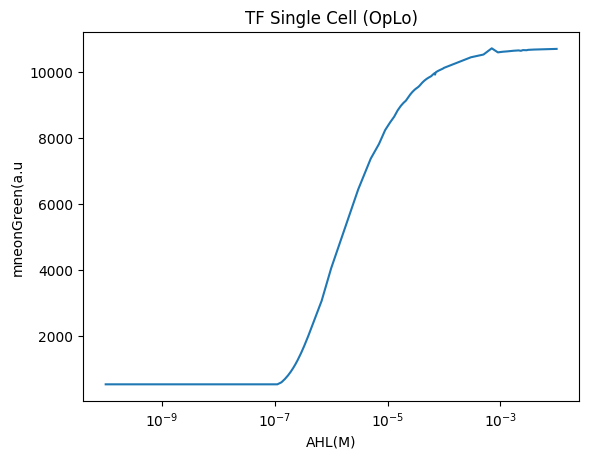

In [134]:
#Single-cell TF (with AHL in nM)
mng_temp=[]
small=0
n=1.5
kd1=100*10**(-9)
kd2=20*10**(-9)
kdlux=100*10**(-9)
k1=k_min_one/kd1
k2=k_min_two/kd2
AHL_values_0=np.linspace(10**(-10),10**(-8))
AHL_values_1=np.linspace(10**(-8),10**(-6))
AHL_values_2=np.linspace(10**(-6),10**(-4))
AHL_values_3=np.linspace(10**(-4),10**(-2))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])
for i in range(np.shape(AHL_values)[0]):
    x0=[AHL_values[i],0,0,0,0]
    solution=odeint(single_cell,x0,t)
    mng_temp.append(max(solution[:,4]))
plt.semilogx(AHL_values,mng_temp)
plt.xlabel('AHL(M)')
plt.ylabel('mneonGreen(a.u')
plt.title('TF Single Cell (OpLo)')

Text(0.5, 1.0, 'TF Whole Cell (OpLo)')

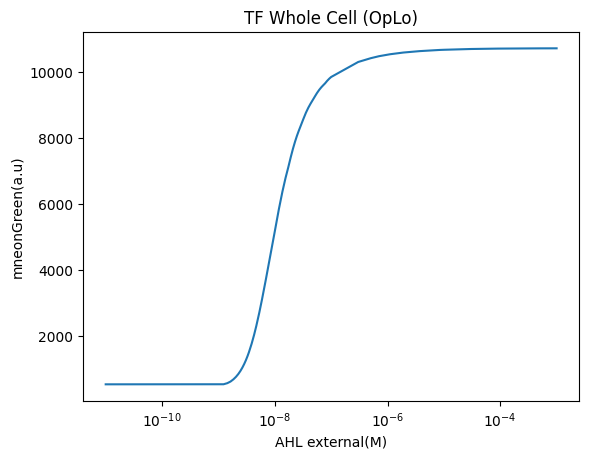

In [126]:
#TF for whole-cell model

mng_temp=[]
small=0
n=1.5
kd1=100*10**(-9)
kd2=20*10**(-9)
kdlux=100*10**(-9)
kdlux_eff=kdlux*CN
k1=k_min_one/kd1
k2=k_min_two/kd2
AHL_values_0=np.linspace(10**(-11),10**(-8))
AHL_values_1=np.linspace(10**(-8),10**(-7))
AHL_values_2=np.linspace(10**(-7),10**(-5))
AHL_values_3=np.linspace(10**(-5),10**(-3))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])
for i in range(np.shape(AHL_values)[0]):
    x0=[Nmin,AHL_values[i],0,0,0,0,0]
    solution=odeint(whole_cell,x0,t)
    mng_temp.append(max(solution[:,6]))
plt.semilogx(AHL_values,mng_temp)
plt.xlabel('AHL external(M)')
plt.ylabel('mneonGreen(a.u)')
plt.title('TF Whole Cell (OpLo)')

In [127]:
#model_fit_functions
def f(x,t,paras):
    Ni=x[0]
    AHL_ext=x[1]
    AHL_int=x[2]
    LuxR=x[3]
    Mon=x[4]
    Dim=x[5]
    mng=x[6]
    
    
    try:
        mi = paras['mi'].value
        a_luxr = paras['a_luxr'].value
        b_plux=paras['b_plux'].value
        a_mng = paras['a_mng'].value
        kdlux=paras['kdlux'].value
        n = paras['n'].value
        d_mng = paras['d_mng'].value
        d_mrnamng = paras['d_mrnamng'].value


    except KeyError:
        mi,a_luxr_b_plux,a_mng,n,d_mng = paras
    
    dNdt=small+mi*Ni*(1-(Ni/Nmax))
    dAHL_extdt=small+D*Vc*Ni*(AHL_int-AHL_ext)-(d_AHL+mi)*AHL_ext
    dAHLdt=small+k_min_one*Mon-k1*AHL_int*LuxR -(d_AHL+mi)*AHL_int +D*Vc*10**(11)*(AHL_ext-AHL_int)
    dLuxRdt=small+ molar(((a_luxr*CN))/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL_int
    dMondt=small+ (k1*LuxR*AHL_int+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt=small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt =small+ ((a_mng*CN)/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux,n))))) - (d_mng+mi)*mng
    
    return [dNdt,dAHL_extdt,dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]

def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x

def residual(paras, t, data):
    mng_model=[]
    for i in range(len(x0_measured)):
        x0=[Nmin,x0_measured[i],0,0,0,0,0]
        model = g(t, x0, paras)
        mng_model.append(max(model[:,6]))
    mng_model=np.array(mng_model)
    data=np.array(data)
    print( paras['mi'].value,paras['b_plux'].value,paras['a_luxr'].value,paras['a_mng'].value,paras['kdlux'].value,paras['n'].value,paras['d_mng'].value,paras['d_mrnamng'].value)
    print(mng_model)
    #print(data)
    #print(np.mean((abs(mng_model)-abs(data)).ravel()))
    return (mng_model-data).ravel()



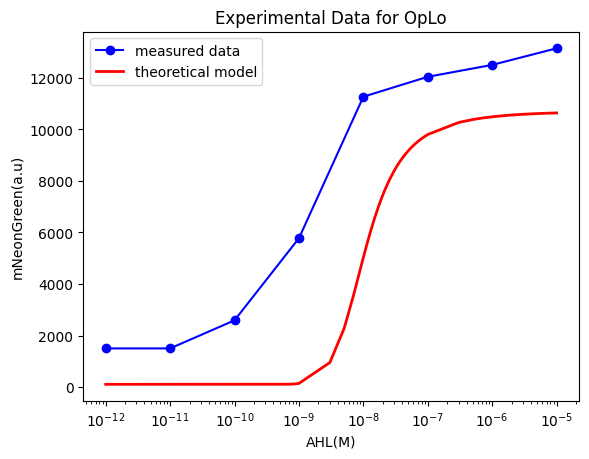

In [128]:
t_measured=[0,20,40,60,80,100,120,150,180,240,300,360]
x6_measured=[1500,1500,2589,5774,11262,12035,12496,13139]
x0_measured=np.array([10**(-6),10**(-5),0.0001,0.001,0.01,0.1,1,10])*10**(-6)

plt.figure()
plt.semilogx(x0_measured, x6_measured, marker='o', color='b', label='measured data')
plt.xlabel('AHL(M)')
plt.ylabel('mNeonGreen(a.u)')
plt.title('Experimental Data for OpLo')

params=Parameters()
params.add('mi', value=0.015, min=0, max=1)
params.add('b_plux',value=0.01, min=0,max=1)
params.add('a_luxr', value=5.68, min=0, max=100)
params.add('a_mng', value=0.85, min=0, max=100)
params.add('kdlux', value=100*10**(-9), min=10**(-18), max=1)
params.add('n', value=1.5, min=0.25, max=4)
params.add('d_mng',value=0.01,min=0,max=1)
params.add('d_mrnamng',value=0.039,min=0,max=1)

AHL_values_0=np.linspace(10**(-10),10**(-9))
AHL_values_1=np.linspace(10**(-9),10**(-7))
AHL_values_2=np.linspace(10**(-7),10**(-5))
AHL_values_3=np.linspace(10**(-5),10**(-3))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])*10**(-2)

mng_fit=[]

#for i in range(len(x0_measured)):
#    y0=[1,x0_measured[i],0,0,0,0,0]
#    model_fit=g(np.linspace(0,360,100),y0,params)
#    mng_fit.append(max(model_fit[:,6]))

for i in range(200):
    y0=[Nmin,AHL_values[i],0,0,0,0,0]
    model_fit=g(np.linspace(0,360,100),y0,params)
    mng_fit.append(max(model_fit[:,6]))
    
plt.semilogx(AHL_values, mng_fit,linewidth=2,color='red',label='theoretical model')
plt.legend()
plt.show()

In [ ]:
#dont_run_it_again -> endless runs
#parameters from fitting are on the cell below
#result = minimize(residual, params, args=(t_measured, x6_measured),method='Nelder-Mead', tol=1e-6) #doesnt stop
#print(result.params)

C:\Users\manos\AppData\Local\Temp\ipykernel_1492\2345398048.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g^" (-> marker='^'). The keyword argument will take precedence.
  plt.semilogx(x0_measured, x6_measured,'g^', marker='o', color='b', label='measured data')
C:\Users\manos\AppData\Local\Temp\ipykernel_1492\2345398048.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  plt.semilogx(x0_measured, x6_measured,'g^', marker='o', color='b', label='measured data')


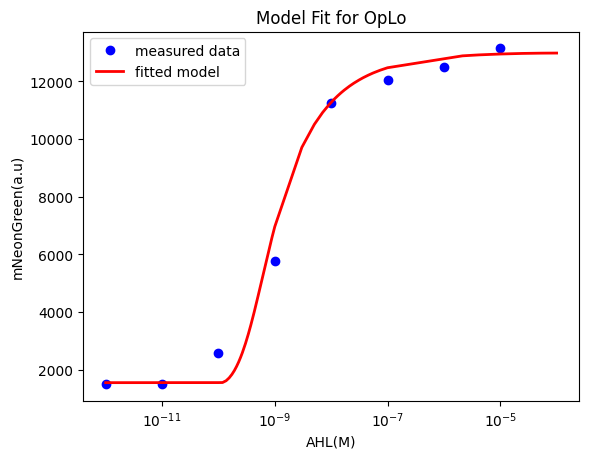

In [129]:
params['mi'].value=0.016
params['b_plux'].value=0.12
params['a_luxr'].value=2.12
params['a_mng'].value=0.45
params['kdlux'].value=0.5*10**(-9)
params['n'].value= 1
params['d_mng'].value=0.0013
params['d_mrnamng'].value=0.018



plt.figure()
plt.semilogx(x0_measured, x6_measured,'g^', marker='o', color='b', label='measured data')
plt.xlabel('AHL(M)')
plt.ylabel('mNeonGreen(a.u)')
plt.title('Model Fit for OpLo')

AHL_values_0=np.linspace(10**(-10),10**(-8))
AHL_values_1=np.linspace(10**(-8),10**(-7))
AHL_values_2=np.linspace(10**(-7),10**(-5))
AHL_values_3=np.linspace(10**(-5),10**(-2))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2,AHL_values_3])*10**(-2)

mng_fit=[]

for i in range(200):
    y0=[Nmin,AHL_values[i],0,0,0,0,0]
    model_fit=g(np.linspace(0,360,100),y0,params)
    mng_fit.append(max(model_fit[:,6]))

plt.semilogx(AHL_values, mng_fit,linewidth=2,color='red',label='fitted model')
plt.legend()
plt.show()
